# Data Preparation for Newspaper

## Librerias

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import fnmatch
from matplotlib.image import imread
import cv2
from PIL import Image
#from skimage.transform import resize

## Información de las Páginas

### Cantidad de páginas y tamaño de página

In [2]:
# Contabilizamos la cantidad de archivos .jpg en la carpeta "Diario La Republica"

def find_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for basename in files:
            if fnmatch.fnmatch(basename, pattern):
                filename = os.path.join(root, basename)
                yield filename

jpg_counter = 0
for filename in find_files('Diario La Republica', '*.jpg'):
    jpg_counter += 1

print("Cantidad de archivos .jpg en la carpeta 'Diario La Republica':", jpg_counter)


Cantidad de archivos .jpg en la carpeta 'Diario La Republica': 8121


In [3]:
# Ruta relativa de referencia
relative_path = 'Diario La Republica/2022/11/01/la república (lima, perú)/p1.jpg'

portada_referencia = imread(relative_path)

altura_px_real = portada_referencia.shape[0]
ancho_px_real = portada_referencia.shape[1]

altura_px_real, ancho_px_real


(6038, 4756)

In [4]:
# Definimos las dimensiones de referencia de la imagen de la portada
altura_px_ref = 1040
ancho_px_ref = 820

### Creación de carpeta que tendrán todas las páginas de noticias

In [91]:
# Creamos una carpeta para guardar las imágenes de las portadas de los diarios en caso no exista.
# Será una carpeta llamada "Portadas" en la misma ubicación que este script.
# Se tendrá dos subcarpetas, una llamada "mascaras" y otra llamada "portadas".

if not os.path.exists('Portadas'):
    os.makedirs('Portadas')
    os.makedirs('Portadas/mascaras')
    os.makedirs('Portadas/portadas')

### Traspaso y redismensión de páginas

In [6]:
jpg_counter2 = 0
for filename in find_files('Portadas/portadas', '*.jpg'):
    jpg_counter2 += 1

jpg_counter, jpg_counter2

(8121, 8121)

In [7]:
# Llenamos la carpeta Portadas/portadas

for filename in find_files('Diario La Republica', '*.jpg'):

    # Obtenemos los nombres de las carpetas que contienen el archivo
    folders = []
    for folder in filename.split("/"):
        folders.append(folder)


    # Guardamos las partes relevantes
    year = folders[1]
    month = folders[2]
    day = folders[3]
    page_number = folders[5]

    # Definimos el nuevonombre de la imagen
    image_name = year + '-' + month + '-' + day + '-' + page_number

    # Cargamos la imagen
    image = imread(filename)

    # Redimensionamos la imagen
    image = cv2.resize(image, (ancho_px_ref, altura_px_ref))

    # Guardamos la imagen
    plt.imsave('Portadas/portadas/' + image_name, image)


## Lectura de datos

In [95]:
# Lectura del dataset
file_name = "Data - Medio La República.xlsx" # Hay varios NULOS en la columna "Seccion"
file_name = "Data V2..0.xlsx"

sheet_name = "Hoja1"

dataset = pd.read_excel(file_name, sheet_name)
print('Se leyo el archivo "'+ file_name +'" con exito')
print('Dimensiones del dataset: ', dataset.shape)

Se leyo el archivo "Data V2..0.xlsx" con exito
Dimensiones del dataset:  (55270, 18)


/tmp/ipykernel_2599466/1835438326.py:7: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  dataset = pd.read_excel(file_name, sheet_name)


In [96]:
dataset.head()

ID_archivo_multimedia         Medio ProgramaSeccion Pagina   Seccion  \
0               21344082  La República    La República     p6  Política   
1               21344076  La República    La República     p7  Política   
2               21344066  La República    La República     p6  Política   
3               21344021  La República    La República     p1   Portada   
4               21344018  La República    La República     p1   Portada   

          TITULO                                           RESUMEN  \
0             NaN                                              NaN   
1  Aviso -Cálidda  1,5 millones de familias conectadas al progreso   
2  Aviso - Sunarp                           Rectificación de aviso   
3             NaN                                              NaN   
4             NaN                                              NaN   

           fec_emision        fec_registro        ruta      Archivo  \
0  2022-11-22 00:00:00 2022-11-22 06:32:00  2022\11\22  71121344082   
1  2022-11-22 00:00:00 2022-11-22 06:31:00  2022\11\22  97021344076   
2  2022-11-22 00:00:00 2022-11-22 06:30:00  2022\11\22  34921344066   
3  2022-11-22 00:00:00 2022-11-22 06:23:00  2022\11\22  16421344021   
4  2022-11-22 00:00:00 2022-11-22 06:23:00  2022\11\22  60721344018   

   num_coord_x  num_coord_y  num_ancho_pixel  num_ancho_cm  num_alto_cm  \
0           41          513            250.0          8.81        18.20   
1           27          519            749.0         26.42        17.39   
2          294          733            247.0          8.71         9.98   
3           48         1652            305.0          5.37         7.60   
4           43         1429            920.0         16.22         4.00   

   num_alto_pixel  Unnamed: 17  
0           516.0          NaN  
1           493.0          NaN  
2           283.0          NaN  
3           431.0          NaN  
4           227.0          NaN

## Interpretación de las columas (variables)

In [97]:
# Columnas del dataset y sus tipos de datos
dataset.dtypes

ID_archivo_multimedia             int64
Medio                            object
ProgramaSeccion                  object
Pagina                           object
Seccion                          object
TITULO                           object
RESUMEN                          object
fec_emision                      object
fec_registro             datetime64[ns]
ruta                             object
Archivo                          object
num_coord_x                       int64
num_coord_y                       int64
num_ancho_pixel                 float64
num_ancho_cm                    float64
num_alto_cm                     float64
num_alto_pixel                  float64
Unnamed: 17                     float64
dtype: object

- **ID_archivo_multimedia**: Identificador único del artículo de noticia.
- **Medio**: Periódico nacional peruano en donde se encuentra el artículo de noticia.
- **ProgramaSeccion**: Mismo valor que el "Medio".
- **Pagina**: Página en la que se encuentra el artículo de noticia.
- **Seccion**: Sección a la que pertenece el artículo de noticia.
- **TITULO**: Título del artículo.
- **RESUMEN**: Cuerpo del artículo.
- **fec_emision**: Día en el que se emitió el periódico al que pertenece el artículo.
- **fec_registro**: Día en el que se registró el periódico al que pertenece el artículo.
- **ruta**: Ruta interna en donde se encuentra la portada en la que está el artículo.
- **Archivo**: Identificador del archivo que representa el artículo.
- **num_coord_x**: Coordenada X que da referencia a una esquina del artículo.
- **num_coord_y**: Coordenada Y que da referencia a una esquina del artículo.
- **num_ancho_pixel**: Anchura del artículo en pixeles.
- **num_ancho_cm**: Anchura del artículo en centímetros.
- **num_alto_cm**: Altura del artículo en centímetros.
- **num_alto_pixel**: Altura del artículo en pixeles.
- **Unnamed**: Desconocido.

Dado que por el momento solo se está trabajando con el periódico "La República", las variables que se van a utilizar son:

- **Pagina**
- **Seccion**
- **TITULO**
- **RESUMEN**
- **ruta**
- **num_coord_x**
- **num_coord_y**
- **num_ancho_pixel**
- **num_alto_pixel**

In [98]:
columns = ['Pagina', 'Seccion', 'TITULO ', 'RESUMEN', 'ruta', 
           'num_coord_x', 'num_coord_y', 'num_ancho_pixel', 'num_alto_pixel']

# Eliminamos las columnas que no son de interés
dataset = dataset[columns]

# Creamos una columna llamada "valid", que será True para todos los registros (servirá para filtrar los registros que no se puedan procesar)
dataset['valid'] = True


In [99]:
dataset.head()

Pagina   Seccion         TITULO   \
0     p6  Política             NaN   
1     p7  Política  Aviso -Cálidda   
2     p6  Política  Aviso - Sunarp   
3     p1   Portada             NaN   
4     p1   Portada             NaN   

                                           RESUMEN        ruta  num_coord_x  \
0                                              NaN  2022\11\22           41   
1  1,5 millones de familias conectadas al progreso  2022\11\22           27   
2                           Rectificación de aviso  2022\11\22          294   
3                                              NaN  2022\11\22           48   
4                                              NaN  2022\11\22           43   

   num_coord_y  num_ancho_pixel  num_alto_pixel  valid  
0          513            250.0           516.0   True  
1          519            749.0           493.0   True  
2          733            247.0           283.0   True  
3         1652            305.0           431.0   True  
4         1429            920.0           227.0   True

In [100]:
dataset['Seccion'].value_counts()

Opinión           9248
Política          7478
Portada           5570
Economía          5074
Sociedad          4263
Deportes          1110
En Portada        1029
Mundo              860
Ocio y Cultura     859
En portada         706
Especial           623
Tema del Día       568
Aviso              408
Editorial          307
Entrevista          61
La Contra           53
Publireportaje      22
Judicial            21
Medio ambiente      15
Actualidad           3
Perú Radar           1
Name: Seccion, dtype: int64

In [101]:
dataset['Seccion'].value_counts()

Opinión           9248
Política          7478
Portada           5570
Economía          5074
Sociedad          4263
Deportes          1110
En Portada        1029
Mundo              860
Ocio y Cultura     859
En portada         706
Especial           623
Tema del Día       568
Aviso              408
Editorial          307
Entrevista          61
La Contra           53
Publireportaje      22
Judicial            21
Medio ambiente      15
Actualidad           3
Perú Radar           1
Name: Seccion, dtype: int64

In [102]:
# Guarda en una lista todas las secciones sin repetir ordenadas por orden de frecuencia
secciones = dataset['Seccion'].value_counts().index.tolist()
secciones

['Opinión',
 'Política',
 'Portada',
 'Economía',
 'Sociedad',
 'Deportes',
 'En Portada',
 'Mundo',
 'Ocio y Cultura',
 'En portada',
 'Especial',
 'Tema del Día',
 'Aviso',
 'Editorial',
 'Entrevista',
 'La Contra',
 'Publireportaje',
 'Judicial',
 'Medio ambiente',
 'Actualidad',
 'Perú Radar']

In [104]:
# crea una lista de 1 a n, donde n es la cantidad de secciones
secciones_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
secciones_num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [105]:
# Obtenemos las secciones únicas ordenadas por frecuencia
dataset['Seccion_num'] = dataset['Seccion']
dataset['Seccion_num'].replace(secciones,
                        secciones_num, inplace=True)

In [106]:
dataset.head()

Pagina   Seccion         TITULO   \
0     p6  Política             NaN   
1     p7  Política  Aviso -Cálidda   
2     p6  Política  Aviso - Sunarp   
3     p1   Portada             NaN   
4     p1   Portada             NaN   

                                           RESUMEN        ruta  num_coord_x  \
0                                              NaN  2022\11\22           41   
1  1,5 millones de familias conectadas al progreso  2022\11\22           27   
2                           Rectificación de aviso  2022\11\22          294   
3                                              NaN  2022\11\22           48   
4                                              NaN  2022\11\22           43   

   num_coord_y  num_ancho_pixel  num_alto_pixel  valid  Seccion_num  
0          513            250.0           516.0   True          2.0  
1          519            749.0           493.0   True          2.0  
2          733            247.0           283.0   True          2.0  
3         1652            305.0           431.0   True          3.0  
4         1429            920.0           227.0   True          3.0

## Funciones para la extracción de polígonos

In [107]:
def get_relative_path(row):

    path = row['ruta']
    path = path.replace('\\', '/')

    relative_path = 'Diario La Republica/' + path + '/la república (lima, perú)/' + str(row['Pagina']) + '.jpg'
    return relative_path

In [108]:
def get_relative_path2(row):

    path = row['ruta']
    path = path.replace('\\', '-')

    relative_path = 'Portadas/portadas/' + path + '-' + str(row['Pagina']) + '.jpg'
    
    return relative_path

In [109]:
def get_relative_path3(row):

    path = row['ruta']
    path = path.replace('\\', '-')

    relative_path = 'Portadas/mascaras/' + path + '-' + str(row['Pagina']) + '.npy'
    
    return relative_path

In [110]:
def get_coordinates(row):

    factor = 5.8

    x = row['num_coord_x'] * factor
    y = row['num_coord_y'] * factor
    width = row['num_ancho_pixel'] * factor
    height = row['num_alto_pixel'] * factor
    color = row['Seccion_num']

    threshold = 0.05
    if x+width > ancho_px_real*(1+threshold) or y+height > altura_px_real*(1+threshold):
        x /= 2
        y /= 2
        width /= 2
        height /= 2

    return x, y, width, height, color

In [111]:
def extract_article(dataset, row):

    # Ruta del dataset
    route = dataset['ruta'].iloc[row]

    # Cambio del formato de la ruta, se reemplaza los '\' por '/'
    route = route.replace('\\', '/')

    # Ruta relativa
    relative_route = 'Diario La Republica/' + route + '/la república (lima, perú)/' + dataset['Pagina'].iloc[row] + '.jpg'
    print(relative_route)

    image = imread(relative_route)

    Px, Py, anchopx, altopx, color = get_coordinates(dataset.iloc[row])

    print(Px, Py, anchopx, altopx, color)

    section_image = image[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)]

    return section_image

## Preprocesamiento de datos

### Evaluación de Nulos

In [112]:
# Porcentaje de filas (registros) vacías por cada columna (variable). Cuanto más cercano el valor a 1 significa que tiene más filas (registros) vacías
dataset.isna().sum() / len(dataset)

Pagina             0.000000
Seccion            0.307418
TITULO             0.167053
RESUMEN            0.168934
ruta               0.000018
num_coord_x        0.000000
num_coord_y        0.000000
num_ancho_pixel    0.000000
num_alto_pixel     0.000434
valid              0.000000
Seccion_num        0.307418
dtype: float64

In [113]:
# Creamos el dataframe "unproccessed" que contendrá las rutas de las imágenes en donde 1 o más registros no se pudieron procesar 
unproccessed = pd.DataFrame(columns=['ruta', 'Pagina'])

In [114]:
# Definimos todos los valid como True
dataset['valid'] = True

# Definimos las columnas en donde no se aceptarán valores nulos
not_null_columns = ['Seccion', 'ruta', 'num_coord_x', 'num_coord_y', 'num_ancho_pixel', 'num_alto_pixel']

# Invalidamos los registros que tengan valores nulos en las columnas definidas en "not_null_columns"
dataset.loc[dataset[not_null_columns].isna().any(axis=1), 'valid'] = False

# Agregamos los registros que no se pudieron procesar a "unproccessed"
unproccessed = pd.concat([unproccessed, dataset.loc[dataset[not_null_columns].isna().any(axis=1), ['ruta', 'Pagina']]], ignore_index=True)

# Eliminamos los registros que no son válidos
dataset = dataset[dataset['valid'] == True]

# Si hay más de 1 fila con el mismo valor en ruta y página, se eliminarán los registros duplicados del dataframe "unproccessed"
unproccessed = unproccessed.drop_duplicates(subset=['ruta', 'Pagina'])

In [115]:
unproccessed.head()

ruta Pagina
0  2022\11\20     p4
1  2022\11\05     p7
2  2022\10\22    p15
3  2022\10\19    p12
4  2022\10\14     p3

In [116]:
# Mostrar la cantidad de portadas en donde 1 o más artículos no se pudieron procesar
print('Cantidad de portadas en donde 1 o más artículos no se pudieron procesar:', len(unproccessed))

Cantidad de portadas en donde 1 o más artículos no se pudieron procesar: 6840


### Evaluación de la ruta

In [117]:
# A los objetos tipo 'Object' le damos propiedades de tipo 'String'
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col] = dataset[col].astype(str)

In [118]:
# Find the value counts of the lenght of the strings in the column "ruta"
dataset['Pagina'].apply(lambda x: len(x)).value_counts()

3    20879
2    17382
Name: Pagina, dtype: int64

Para la **Página**, una longitud de 2 o 3 es aceptada, ya que abarca 'pX' y 'p1X'. 
 - Ej.: p11

In [119]:
# Find the value counts of the lenght of the strings in the column "ruta"
dataset['ruta'].apply(lambda x: len(x)).value_counts()

10    38257
19        4
Name: ruta, dtype: int64

Para la **ruta**, la única longitud aceptada es 10, ya que abarca '20XX/XX/XX'. 
 - Ej.: 2022/01/02

In [120]:
# Muestra todos los registros que tengan una longitud diferente de 10 en la columna "ruta"
dataset[dataset['ruta'].apply(lambda x: len(x) != 10)]

Pagina  Seccion                                            TITULO   \
10811     p9  Opinión          ¿Ha terminado la guerra? - Cecilia Méndez   
17129    p14  Opinión         Ciberseguridad gubernamental - Ragi Burhum   
27221     p9  Opinión    Saber ganar, saber perder - Rosa María Palacios   
35944    p14  Opinión  De pestes, pandemias y falsedades - Roberto Oc...   

                                                 RESUMEN                 ruta  \
10811  Hemos ganado la guerra, pero no la posguerra”,...  2022-04-25 05:05:00   
17129  No puedo creer esto”, le dije por WhatsApp dur...  2021-12-19 05:46:00   
27221  Digamos que ganaste la carrera y que el premio...  2021-06-13 04:39:00   
35944  Lo peor de la peste no es que mata a los cuerp...  2020-12-22 04:08:00   

       num_coord_x  num_coord_y  num_ancho_pixel  num_alto_pixel  valid  \
10811  32919815222           25             58.0           11.60   True   
17129  14218989083           17            651.0           12.98   True   
27221  27717712908           34             61.0           34.11   True   
35944  57316604610           34            680.0           12.02   True   

       Seccion_num  
10811          1.0  
17129          1.0  
27221          1.0  
35944          1.0

Notamos que tiene otro formato de fecha, por lo que ajustamos el valor.

In [121]:
# Modificamos el formato de la columna "ruta" para que tenga una longitud de 10 caracteres (recortamos)
dataset['ruta'] = dataset['ruta'].apply(lambda x: x[:10])

# Reemplazamos '-' por '\' en la columna "ruta"
dataset['ruta'] = dataset['ruta'].apply(lambda x: x.replace('-', '\\'))


In [122]:
dataset['ruta'].apply(lambda x: len(x)).value_counts()

10    38261
Name: ruta, dtype: int64

### Evaluación del tamaño y posición del artículo

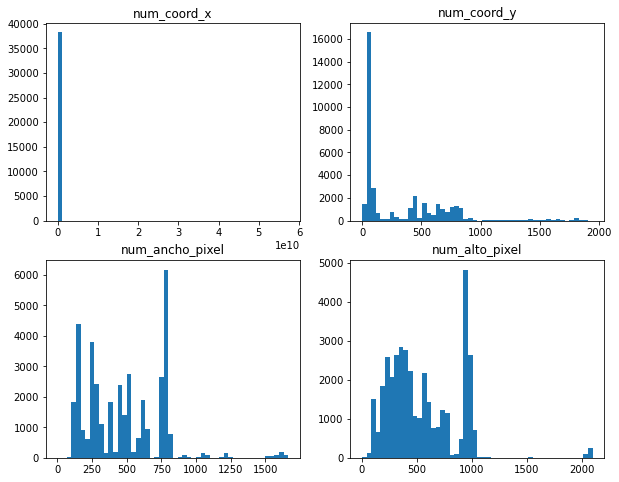

In [123]:
histogram_columns = ['num_coord_x', 'num_coord_y', 'num_ancho_pixel', 'num_alto_pixel']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, col in enumerate(histogram_columns):
    axs[i//2, i%2].hist(dataset[col], bins=50)
    axs[i//2, i%2].set_title(col)

plt.show()

#### Valores negativos

In [124]:
# Muestra en un dataframe los valores negativos de las columnas en histogram_columns
negative_values = dataset[dataset[histogram_columns].apply(lambda x: (x < 0).any(), axis=1)]
negative_values

Pagina  Seccion                                            TITULO   \
11283     p1  Portada  “El presidente divide a los trabajadores y a m...   
11334     p1  Portada                 “Es hora de que nos vayamos todos”   
13020     p1  Portada                 Congreso legisla con nombre propio   
15170     p1  Portada                               Triunfo que ilusiona   

                                                 RESUMEN        ruta  \
11283  NOTA CENTRAL. Castro afirma que Pedro Castillo...  2022\04\15   
11334  NOTA CENTRAL. Pablo señala la urgencia de hall...  2022\04\14   
13020  NOTA CENTRAL. Aprueban ley que permite a los p...  2022\03\11   
15170  NOTA CENTRAL. La ʻBicolorʼ logró una victoria ...  2022\01\29   

       num_coord_x  num_coord_y  num_ancho_pixel  num_alto_pixel  valid  \
11283            0           -1           1609.0          2092.0   True   
11334            0           -1           1622.0          2092.0   True   
13020            0           -1           1609.0          2092.0   True   
15170            0           -1           1590.0          2092.0   True   

       Seccion_num  
11283          3.0  
11334          3.0  
13020          3.0  
15170          3.0

Se puede observar que son **Portadas**, y cuyo ancho y alto muestra el tamaño de estas, por lo que el **negativo en num_coord_y puede equivaler a un 0**

Ya que son pocos datos, se extraerá y evaluará los polígonos extraidos.

In [125]:
# Convertimos la columna num_coord_y a 0
negative_values.loc[negative_values['num_coord_y'] < 0, 'num_coord_y'] = 0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Diario La Republica/2022/04/15/la república (lima, perú)/p1.jpg
0.0 0.0 4666.099999999999 6066.8 3.0
Diario La Republica/2022/04/14/la república (lima, perú)/p1.jpg
0.0 0.0 4703.8 6066.8 3.0
Diario La Republica/2022/03/11/la república (lima, perú)/p1.jpg
0.0 0.0 4666.099999999999 6066.8 3.0
Diario La Republica/2022/01/29/la república (lima, perú)/p1.jpg
0.0 0.0 4611.0 6066.8 3.0


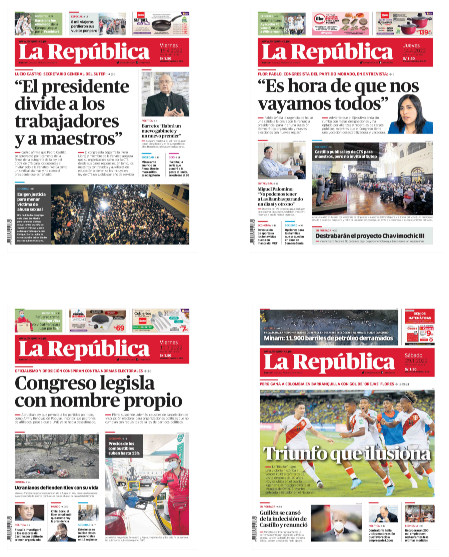

In [126]:
# Mostramos las imágenes de negative_values en un subplot 2x2
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

for i in range(4):
    section_image = extract_article(negative_values, i)
    axs[i//2, i%2].imshow(section_image)
    axs[i//2, i%2].axis('off')

plt.show()

Se extrajo correctamente los polígonos, por lo que se mantiene el cambio.

In [127]:
# Aplicamos el cambio al dataset original
dataset.loc[dataset['num_coord_y'] < 0, 'num_coord_y'] = 0

# Liberamos memoria
del negative_values

#### Valores muy sobresalientes

En base al **histograma de num_cord_x** se puede observar que existen pocos valores muy altos.

In [128]:
# Obtenemos los valores inconsistentes de la columna num_coord_x
inconsistent_values = dataset[dataset['num_coord_x'] > 1500]
inconsistent_values

Pagina  Seccion                                            TITULO   \
10811     p9  Opinión          ¿Ha terminado la guerra? - Cecilia Méndez   
17129    p14  Opinión         Ciberseguridad gubernamental - Ragi Burhum   
27221     p9  Opinión    Saber ganar, saber perder - Rosa María Palacios   
35944    p14  Opinión  De pestes, pandemias y falsedades - Roberto Oc...   

                                                 RESUMEN        ruta  \
10811  Hemos ganado la guerra, pero no la posguerra”,...  2022\04\25   
17129  No puedo creer esto”, le dije por WhatsApp dur...  2021\12\19   
27221  Digamos que ganaste la carrera y que el premio...  2021\06\13   
35944  Lo peor de la peste no es que mata a los cuerp...  2020\12\22   

       num_coord_x  num_coord_y  num_ancho_pixel  num_alto_pixel  valid  \
10811  32919815222           25             58.0           11.60   True   
17129  14218989083           17            651.0           12.98   True   
27221  27717712908           34             61.0           34.11   True   
35944  57316604610           34            680.0           12.02   True   

       Seccion_num  
10811          1.0  
17129          1.0  
27221          1.0  
35944          1.0

In [129]:
# Obtenemos los valores inconsistentes de la columna num_coord_x (incluye los numero muy altos)
inconsistent_values = dataset[dataset['num_coord_x'] > ancho_px_real*2.9 * (1+0.05)]
inconsistent_values


Pagina  Seccion                                            TITULO   \
10811     p9  Opinión          ¿Ha terminado la guerra? - Cecilia Méndez   
17129    p14  Opinión         Ciberseguridad gubernamental - Ragi Burhum   
27221     p9  Opinión    Saber ganar, saber perder - Rosa María Palacios   
35944    p14  Opinión  De pestes, pandemias y falsedades - Roberto Oc...   

                                                 RESUMEN        ruta  \
10811  Hemos ganado la guerra, pero no la posguerra”,...  2022\04\25   
17129  No puedo creer esto”, le dije por WhatsApp dur...  2021\12\19   
27221  Digamos que ganaste la carrera y que el premio...  2021\06\13   
35944  Lo peor de la peste no es que mata a los cuerp...  2020\12\22   

       num_coord_x  num_coord_y  num_ancho_pixel  num_alto_pixel  valid  \
10811  32919815222           25             58.0           11.60   True   
17129  14218989083           17            651.0           12.98   True   
27221  27717712908           34             61.0           34.11   True   
35944  57316604610           34            680.0           12.02   True   

       Seccion_num  
10811          1.0  
17129          1.0  
27221          1.0  
35944          1.0

In [130]:
# Agregamos los registros que no se pudieron procesar a "unproccessed"
unproccessed = pd.concat([unproccessed, inconsistent_values.loc[:, ['ruta', 'Pagina']]], ignore_index=True)
unproccessed = unproccessed.drop_duplicates(subset=['ruta', 'Pagina'])


# TEMPORAL: Se eliminan los registros inconsistentes
dataset = dataset[dataset['num_coord_x'] < ancho_px_real*2.9 * (1+0.05)]

# Generación de máscaras

## Extracción de polígonos (artículos)

In [131]:
partial_dataset = dataset

In [133]:
# Creamos todas las máscaras posibles

for index, row in partial_dataset.iterrows():
    
    # Ruta relativa
    relative_path = get_relative_path2(row)
    mask_path = get_relative_path3(row)
    print(str(index) + ': ' + relative_path)

    # Portada a la que pertenece el artículo
    if not os.path.exists(relative_path):
        print('   No existe la ruta:', relative_path)
        row['valid'] = False
        continue

    # Coordenadas del artículo
    Px, Py, anchopx, altopx, color = get_coordinates(row)

    if Px+anchopx > ancho_px_real or Py+altopx > altura_px_real:
        row['valid'] = False
        continue

    if not os.path.exists(mask_path):

        # Crea un arreglo de ceros (llamado new_mask) con las dimensiones de la portada
        new_mask = np.zeros((altura_px_real, ancho_px_real)).astype(np.uint8)

        # Modifica new_mask en base a Px, Py, anchopx, altopx y color
        new_mask[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)] = color

        # Guarda new_mask en la carpeta "Portadas/mascaras" con el nombre de la ruta relativa
        np.save(mask_path, new_mask)
    
    else:
        located_mask = np.load(mask_path, mmap_mode='r+')

        # Modifica located_mask en base a Px, Py, anchopx, altopx y color
        located_mask[math.floor(Py):math.floor(Py+altopx), math.floor(Px):math.floor(Px+anchopx)] = color


0: Portadas/portadas/2022-11-22-p6.jpg
1: Portadas/portadas/2022-11-22-p7.jpg
2: Portadas/portadas/2022-11-22-p6.jpg
3: Portadas/portadas/2022-11-22-p1.jpg
4: Portadas/portadas/2022-11-22-p1.jpg
5: Portadas/portadas/2022-11-22-p1.jpg
6: Portadas/portadas/2022-11-22-p11.jpg
7: Portadas/portadas/2022-11-22-p10.jpg
8: Portadas/portadas/2022-11-22-p10.jpg
9: Portadas/portadas/2022-11-22-p10.jpg
10: Portadas/portadas/2022-11-22-p10.jpg
11: Portadas/portadas/2022-11-22-p21.jpg
12: Portadas/portadas/2022-11-22-p10.jpg
13: Portadas/portadas/2022-11-22-p10.jpg
14: Portadas/portadas/2022-11-22-p1.jpg
15: Portadas/portadas/2022-11-22-p1.jpg
16: Portadas/portadas/2022-11-22-p20.jpg
17: Portadas/portadas/2022-11-22-p9.jpg
18: Portadas/portadas/2022-11-22-p9.jpg
19: Portadas/portadas/2022-11-22-p9.jpg
20: Portadas/portadas/2022-11-22-p8.jpg
21: Portadas/portadas/2022-11-22-p19.jpg
22: Portadas/portadas/2022-11-22-p8.jpg
23: Portadas/portadas/2022-11-22-p7.jpg
24: Portadas/portadas/2022-11-22-p7.jpg


In [18]:
for filename in find_files('Portadas/mascaras', '*.npy'):

    # Load the mask
    mask = np.load(filename)

    # Resize the mask
    mask = cv2.resize(mask, (ancho_px_ref, altura_px_ref), interpolation=cv2.INTER_NEAREST)

    np.save(filename, mask)

## Filtración de mascarás válidas

In [4]:
# Definimos las dimensiones de referencia de la imagen de la portada
altura_px_ref = 1040
ancho_px_ref = 820

In [52]:
#  Copiamos todas las máscaras válidas a otra carpeta y le aplicamos un resize

for mask_path in find_files('Portadas/mascaras/', '*.npy'):

    with open(mask_path, 'rb') as f:
        mask = np.load(f)

    threshold = 0.3

    # Contamos el % de 0's en la máscara
    porcentage = np.count_nonzero(mask == 0) / mask.size

    if porcentage < threshold:

        # Definimos el nuevo nombre del archivo
        mask_npy_save = mask_path.replace('Portadas','valid').replace('mascaras', 'mascarasNPY')

        # Resize de la máscara
        mask = cv2.resize(mask, (ancho_px_ref, altura_px_ref), interpolation=cv2.INTER_NEAREST)

        print(mask_npy_save)

        if not os.path.exists(mask_npy_save):
            np.save(mask_npy_save, mask)


valid/mascarasNPY/2022-02-16-p14.npy
valid/mascarasNPY/2022-10-12-p5.npy
valid/mascarasNPY/2022-03-17-p8.npy
valid/mascarasNPY/2022-04-06-p1.npy
valid/mascarasNPY/2022-11-07-p9.npy
valid/mascarasNPY/2022-01-25-p7.npy
valid/mascarasNPY/2022-03-23-p13.npy
valid/mascarasNPY/2022-05-16-p13.npy
valid/mascarasNPY/2022-08-07-p14.npy
valid/mascarasNPY/2022-09-16-p17.npy
valid/mascarasNPY/2022-01-25-p1.npy
valid/mascarasNPY/2022-08-11-p15.npy
valid/mascarasNPY/2022-07-06-p15.npy
valid/mascarasNPY/2022-09-01-p15.npy
valid/mascarasNPY/2022-07-05-p9.npy
valid/mascarasNPY/2022-11-14-p2.npy
valid/mascarasNPY/2022-02-25-p22.npy
valid/mascarasNPY/2022-09-23-p3.npy
valid/mascarasNPY/2022-08-23-p5.npy
valid/mascarasNPY/2022-03-31-p1.npy
valid/mascarasNPY/2022-08-12-p24.npy
valid/mascarasNPY/2022-10-31-p9.npy
valid/mascarasNPY/2022-09-10-p4.npy
valid/mascarasNPY/2022-04-04-p1.npy
valid/mascarasNPY/2022-03-22-p9.npy
valid/mascarasNPY/2022-04-06-p16.npy
valid/mascarasNPY/2022-07-29-p8.npy
valid/mascarasNPY

In [59]:
# Para las máscaras válidas, copiamos y redimensionamos las imágenes JPG correspondientes

for filename in find_files('valid/mascarasNPY', '*.npy'):

    print(filename)

    # Nombre de la portada a buscar
    portada_search = filename.replace('valid/mascarasNPY', 'Portadas/portadas').replace('.npy', '.jpg')

    # Nombre de la portada a guardar
    portada_save = filename.replace('mascarasNPY', 'portadas').replace('.npy', '.jpg')


    if os.path.exists(portada_search) and not os.path.exists(portada_save):

        image = imread(portada_search)

        image = cv2.resize(image, (ancho_px_ref, altura_px_ref))

        plt.imsave(portada_save, image)
    else:
        print('No existe la portada:', portada_search)


valid/mascarasNPY/2022-02-16-p14.npy
valid/mascarasNPY/2022-10-12-p5.npy
valid/mascarasNPY/2022-03-17-p8.npy
valid/mascarasNPY/2022-04-06-p1.npy
valid/mascarasNPY/2022-11-07-p9.npy
valid/mascarasNPY/2022-01-25-p7.npy
valid/mascarasNPY/2022-03-23-p13.npy
valid/mascarasNPY/2022-05-16-p13.npy
valid/mascarasNPY/2022-08-07-p14.npy
valid/mascarasNPY/2022-09-16-p17.npy
valid/mascarasNPY/2022-01-25-p1.npy
valid/mascarasNPY/2022-08-11-p15.npy
valid/mascarasNPY/2022-07-06-p15.npy
valid/mascarasNPY/2022-09-01-p15.npy
valid/mascarasNPY/2022-07-05-p9.npy
valid/mascarasNPY/2022-11-14-p2.npy
valid/mascarasNPY/2022-02-25-p22.npy
valid/mascarasNPY/2022-09-23-p3.npy
valid/mascarasNPY/2022-08-23-p5.npy
valid/mascarasNPY/2022-03-31-p1.npy
valid/mascarasNPY/2022-08-12-p24.npy
valid/mascarasNPY/2022-10-31-p9.npy
valid/mascarasNPY/2022-09-10-p4.npy
valid/mascarasNPY/2022-04-04-p1.npy
valid/mascarasNPY/2022-03-22-p9.npy
valid/mascarasNPY/2022-04-06-p16.npy
valid/mascarasNPY/2022-07-29-p8.npy
valid/mascarasNPY

In [60]:
valid_images_counter = 0
for filename in find_files('valid/portadas/', '*.jpg'):
    valid_images_counter += 1

valid_masks2_counter = 0
for filename in find_files('valid/mascarasNPY/', '*.npy'):
    valid_masks2_counter += 1

print("Cantidad de máscaras válidas en la carpeta 'valid/portadas':", valid_images_counter)
print("Cantidad de máscaras válidas en la carpeta 'valid/mascarasNPY':", valid_masks2_counter)

if valid_images_counter != valid_masks2_counter:
    print("Error, no hay la misma cantidad de archivos.")

Cantidad de máscaras válidas en la carpeta 'valid/portadas': 3992
Cantidad de máscaras válidas en la carpeta 'valid/mascarasNPY': 3992


## Separación de train y test

In [61]:
for_testing = int(0.1 * valid_images_counter)
for_testing

399

In [62]:
# Save a copy for the first "for_testing" files from the directory "valid" to the directory "test"

counter = for_testing
for filename in find_files('valid/portadas', '*.jpg'):

    if counter == 0:
        break

    counter -= 1

    print(filename)

    mask_load_name = filename.replace('portadas', 'mascarasNPY').replace('.jpg', '.npy')
    portada_load_name = filename

    mask_save = mask_load_name.replace('valid', 'test')
    portada_save = filename.replace('valid', 'test')

    if not os.path.exists(portada_save):
        plt.imsave(portada_save, imread(portada_load_name))

    if not os.path.exists(mask_save):
        np.save(mask_save, np.load(mask_load_name))

valid/portadas/2022-05-18-p4.jpg
valid/portadas/2022-01-30-p4.jpg
valid/portadas/2022-10-24-p13.jpg
valid/portadas/2022-09-02-p12.jpg
valid/portadas/2022-03-02-p7.jpg
valid/portadas/2022-02-27-p22.jpg
valid/portadas/2022-03-26-p6.jpg
valid/portadas/2022-03-06-p5.jpg
valid/portadas/2022-02-14-p6.jpg
valid/portadas/2022-02-18-p16.jpg
valid/portadas/2022-04-12-p12.jpg
valid/portadas/2022-08-25-p3.jpg


valid/portadas/2022-10-17-p3.jpg
valid/portadas/2022-09-27-p6.jpg
valid/portadas/2022-06-01-p8.jpg
valid/portadas/2022-08-22-p2.jpg
valid/portadas/2022-07-17-p8.jpg
valid/portadas/2022-09-25-p17.jpg
valid/portadas/2022-08-21-p14.jpg
valid/portadas/2022-02-09-p1.jpg
valid/portadas/2022-06-03-p3.jpg
valid/portadas/2022-01-16-p1.jpg
valid/portadas/2022-03-05-p3.jpg
valid/portadas/2022-02-09-p11.jpg
valid/portadas/2022-02-10-p14.jpg
valid/portadas/2022-02-25-p5.jpg
valid/portadas/2022-06-13-p6.jpg
valid/portadas/2022-04-07-p1.jpg
valid/portadas/2022-06-03-p8.jpg
valid/portadas/2022-09-13-p17.jpg
valid/portadas/2022-11-13-p8.jpg
valid/portadas/2022-05-21-p2.jpg
valid/portadas/2022-05-30-p16.jpg
valid/portadas/2022-10-23-p5.jpg
valid/portadas/2022-03-16-p8.jpg
valid/portadas/2022-08-12-p15.jpg
valid/portadas/2022-05-09-p8.jpg
valid/portadas/2022-10-31-p6.jpg
valid/portadas/2022-01-01-p13.jpg
valid/portadas/2022-03-12-p2.jpg
valid/portadas/2022-01-25-p8.jpg
valid/portadas/2022-01-21-p3.jpg
va

In [64]:
test_images_counter = 0
for filename in find_files('test/portadas/', '*.jpg'):
    test_images_counter += 1

test_masks2_counter = 0
for filename in find_files('test/mascarasNPY/', '*.npy'):
    test_masks2_counter += 1

print("Cantidad de máscaras válidas en la carpeta 'test/portadas':", test_images_counter)
print("Cantidad de máscaras válidas en la carpeta 'test/mascarasNPY':", test_masks2_counter)

if test_images_counter != test_masks2_counter:
    print("Error, no hay la misma cantidad de archivos.")

Cantidad de máscaras válidas en la carpeta 'test/portadas': 399
Cantidad de máscaras válidas en la carpeta 'test/mascarasNPY': 399


In [65]:
# Save a copy ignoring the first "for_testing" files from the directory "valid" to the directory "train"

counter = for_testing
for filename in find_files('valid/portadas', '*.jpg'):

    if counter == 0:

        print(filename)

        mask_load_name = filename.replace('portadas', 'mascarasNPY').replace('.jpg', '.npy')
        portada_load_name = filename

        mask_save = mask_load_name.replace('valid', 'train')
        portada_save = filename.replace('valid', 'train')

        if not os.path.exists(portada_save):
            plt.imsave(portada_save, imread(portada_load_name))

        if not os.path.exists(mask_save):
            np.save(mask_save, np.load(mask_load_name))

    else:
        counter -= 1

valid/portadas/2022-05-15-p11.jpg
valid/portadas/2022-02-15-p3.jpg
valid/portadas/2022-08-26-p13.jpg
valid/portadas/2022-01-26-p1.jpg
valid/portadas/2022-02-20-p3.jpg
valid/portadas/2022-10-05-p13.jpg
valid/portadas/2022-02-09-p5.jpg
valid/portadas/2022-03-06-p25.jpg
valid/portadas/2022-11-17-p3.jpg
valid/portadas/2022-03-21-p24.jpg
valid/portadas/2022-08-02-p5.jpg
valid/portadas/2022-01-11-p8.jpg
valid/portadas/2022-05-01-p22.jpg
valid/portadas/2022-05-04-p4.jpg
valid/portadas/2022-09-08-p16.jpg
valid/portadas/2022-03-17-p5.jpg
valid/portadas/2022-11-03-p18.jpg
valid/portadas/2022-07-03-p4.jpg
valid/portadas/2022-05-28-p1.jpg
valid/portadas/2022-04-17-p7.jpg
valid/portadas/2022-01-06-p7.jpg
valid/portadas/2022-09-04-p3.jpg
valid/portadas/2022-09-10-p15.jpg
valid/portadas/2022-03-31-p7.jpg
valid/portadas/2022-10-23-p13.jpg
valid/portadas/2022-02-05-p11.jpg
valid/portadas/2022-08-04-p3.jpg
valid/portadas/2022-06-02-p3.jpg
valid/portadas/2022-09-24-p4.jpg
valid/portadas/2022-07-18-p6.jpg

In [66]:
train_images_counter = 0
for filename in find_files('train/portadas/', '*.jpg'):
    train_images_counter += 1

train_masks2_counter = 0
for filename in find_files('train/mascarasNPY/', '*.npy'):
    train_masks2_counter += 1

print("Cantidad de máscaras válidas en la carpeta 'train/portadas':", train_images_counter)
print("Cantidad de máscaras válidas en la carpeta 'train/mascarasNPY':", train_masks2_counter)

if train_images_counter != train_masks2_counter:
    print("Error, no hay la misma cantidad de archivos.")

Cantidad de máscaras válidas en la carpeta 'train/portadas': 3593
Cantidad de máscaras válidas en la carpeta 'train/mascarasNPY': 3593


### Verificación de clases

In [72]:
unique_values = []
for filename in find_files('valid/mascarasNPY', '*.npy'):

    mask_npy = np.load(filename)

    unique_values.extend(np.unique(mask_npy))

unique_values = np.unique(unique_values)
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

### Verificación de tamaños

In [70]:
# Check if all the files in the folder "train/portadas" have the same dimension
for filename in find_files('valid/portadas', '*.jpg'):
    # print(filename, image.shape)
    image = imread(filename)
    filtered_images = []

    if (image.shape[0] != altura_px_ref or image.shape[1] != ancho_px_ref):
        print(filename, image.shape)
        filtered_masks.append(filename)

In [71]:
# Check if all the files in the folder "train/mascarasNPY" have the same dimension
for filename in find_files('valid/mascarasNPY', '*.npy'):
    mask = np.load(filename)
    filtered_masks = []

    if (mask.shape[0] != altura_px_ref or mask.shape[1] != ancho_px_ref):
        print(filename, mask.shape)
        filtered_masks.append(filename)

## Creación de máscaras Single-Channel, RGB y ONE-HOT

### Máscaras Single-Channel

In [93]:
for filename in find_files('test/mascarasNPY', '*.npy'):

    print(filename)

    # Nombre de la máscara SC a guardar
    mask_sc_save = filename.replace('mascarasNPY', 'mascarasSC').replace('.npy', '.png')
    
    # Cargamos la máscara NPY
    mask_np_load = np.load(filename)

    # Generamos la máscara SC
    mask_sc = Image.fromarray(mask_np_load)

    # Guardamos la máscara SC
    mask_sc.save(mask_sc_save)

for filename in find_files('train/mascarasNPY', '*.npy'):

    print(filename)

    # Nombre de la máscara SC a guardar
    mask_sc_save = filename.replace('mascarasNPY', 'mascarasSC').replace('.npy', '.png')
    
    # Cargamos la máscara NPY
    mask_np_load = np.load(filename)

    # Generamos la máscara SC
    mask_sc = Image.fromarray(mask_np_load)

    # Guardamos la máscara SC
    mask_sc.save(mask_sc_save)


test/mascarasNPY/2022-05-16-p13.npy
test/mascarasNPY/2022-01-25-p1.npy
test/mascarasNPY/2022-03-26-p9.npy
test/mascarasNPY/2022-02-06-p15.npy
test/mascarasNPY/2022-10-26-p5.npy
test/mascarasNPY/2022-11-11-p9.npy
test/mascarasNPY/2022-01-01-p13.npy
test/mascarasNPY/2022-10-10-p19.npy
test/mascarasNPY/2022-08-17-p5.npy
test/mascarasNPY/2022-07-13-p12.npy
test/mascarasNPY/2022-09-13-p17.npy
test/mascarasNPY/2022-01-22-p6.npy
test/mascarasNPY/2022-09-10-p1.npy
test/mascarasNPY/2022-02-17-p12.npy
test/mascarasNPY/2022-10-21-p14.npy
test/mascarasNPY/2022-05-16-p3.npy
test/mascarasNPY/2022-07-15-p7.npy
test/mascarasNPY/2022-03-13-p2.npy
test/mascarasNPY/2022-08-17-p21.npy
test/mascarasNPY/2022-01-27-p14.npy
test/mascarasNPY/2022-10-30-p19.npy
test/mascarasNPY/2022-09-18-p24.npy
test/mascarasNPY/2022-03-12-p3.npy
test/mascarasNPY/2022-04-05-p12.npy
test/mascarasNPY/2022-07-25-p20.npy
test/mascarasNPY/2022-04-07-p1.npy
test/mascarasNPY/2022-04-27-p6.npy
test/mascarasNPY/2022-11-21-p9.npy
test/m

### Máscaras RGB

In [33]:
rgb_dict = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    2: [0, 255, 0],
    3: [0, 255, 255],
    4: [255, 0, 0],
    5: [255, 0, 255],
    6: [255, 255, 0],
    7: [255, 255, 255],
    8: [128, 128, 128],
    9: [128, 128, 0],
    10: [128, 0, 128],
}

In [34]:
# Conversión de la carpeta "test"

for filename in find_files('test/mascarasNPY', '*.npy'):

    print(filename)

    # Nombre de la mascara PNG a guardar
    mask_rgb_save = filename.replace('mascarasNPY', 'mascarasRGB').replace('.npy', '.png')

    if not os.path.exists(mask_rgb_save):

        # Cargamos la mascara NPY
        mask_np_load = np.load(filename)

        # Creamos el arreglo para la mascara en formato PNG
        mask_rgb = np.zeros((mask_np_load.shape[0], mask_np_load.shape[1], 3)).astype(np.uint8)

        # Fill the array with the values of the dictionary
        for key, value in rgb_dict.items():
            mask_rgb[mask_np_load == key] = value

        # Guardamos la mascara en formato PNG
        plt.imsave(mask_rgb_save, mask_rgb)


test/mascarasNPY/2022-05-16-p13.npy
test/mascarasNPY/2022-01-25-p1.npy
test/mascarasNPY/2022-03-26-p9.npy
test/mascarasNPY/2022-02-06-p15.npy
test/mascarasNPY/2022-10-26-p5.npy
test/mascarasNPY/2022-11-11-p9.npy
test/mascarasNPY/2022-01-01-p13.npy
test/mascarasNPY/2022-10-10-p19.npy
test/mascarasNPY/2022-08-17-p5.npy
test/mascarasNPY/2022-07-13-p12.npy
test/mascarasNPY/2022-09-13-p17.npy
test/mascarasNPY/2022-01-22-p6.npy
test/mascarasNPY/2022-09-10-p1.npy
test/mascarasNPY/2022-02-17-p12.npy
test/mascarasNPY/2022-10-21-p14.npy
test/mascarasNPY/2022-05-16-p3.npy
test/mascarasNPY/2022-07-15-p7.npy
test/mascarasNPY/2022-03-13-p2.npy
test/mascarasNPY/2022-08-17-p21.npy
test/mascarasNPY/2022-01-27-p14.npy
test/mascarasNPY/2022-10-30-p19.npy
test/mascarasNPY/2022-09-18-p24.npy
test/mascarasNPY/2022-03-12-p3.npy
test/mascarasNPY/2022-04-05-p12.npy
test/mascarasNPY/2022-07-25-p20.npy
test/mascarasNPY/2022-04-07-p1.npy
test/mascarasNPY/2022-04-27-p6.npy
test/mascarasNPY/2022-11-21-p9.npy
test/m

In [35]:
# Conversión de la carpeta "train"

for filename in find_files('train/mascarasNPY', '*.npy'):

    print(filename)

    # Nombre de la mascara PNG a guardar
    mask_rgb_save = filename.replace('mascarasNPY', 'mascarasRGB').replace('.npy', '.png')

    if not os.path.exists(mask_rgb_save):

        # Cargamos la mascara NPY
        mask_np_load = np.load(filename)

        # Creamos el arreglo para la mascara en formato PNG
        mask_rgb = np.zeros((mask_np_load.shape[0], mask_np_load.shape[1], 3)).astype(np.uint8)

        # Fill the array with the values of the dictionary
        for key, value in rgb_dict.items():
            mask_rgb[mask_np_load == key] = value
        
        # Guardamos la mascara en formato PNG
        plt.imsave(mask_rgb_save, mask_rgb)

train/mascarasNPY/2022-02-16-p14.npy
train/mascarasNPY/2022-10-12-p5.npy
train/mascarasNPY/2022-03-17-p8.npy
train/mascarasNPY/2022-04-06-p1.npy
train/mascarasNPY/2022-11-07-p9.npy
train/mascarasNPY/2022-01-25-p7.npy
train/mascarasNPY/2022-03-23-p13.npy
train/mascarasNPY/2022-08-07-p14.npy
train/mascarasNPY/2022-09-16-p17.npy
train/mascarasNPY/2022-08-11-p15.npy
train/mascarasNPY/2022-07-06-p15.npy
train/mascarasNPY/2022-09-01-p15.npy
train/mascarasNPY/2022-07-05-p9.npy
train/mascarasNPY/2022-11-14-p2.npy
train/mascarasNPY/2022-02-25-p22.npy
train/mascarasNPY/2022-09-23-p3.npy
train/mascarasNPY/2022-08-23-p5.npy
train/mascarasNPY/2022-03-31-p1.npy
train/mascarasNPY/2022-08-12-p24.npy
train/mascarasNPY/2022-10-31-p9.npy
train/mascarasNPY/2022-09-10-p4.npy
train/mascarasNPY/2022-04-04-p1.npy
train/mascarasNPY/2022-03-22-p9.npy
train/mascarasNPY/2022-04-06-p16.npy
train/mascarasNPY/2022-07-29-p8.npy
train/mascarasNPY/2022-07-28-p15.npy
train/mascarasNPY/2022-10-17-p13.npy
train/mascarasNP

### Máscaras ONE-HOT

In [189]:
VOC_COLORMAP = [
        [0, 0, 0],
        [0, 0, 255],
        [0, 255, 0],
        [0, 255, 255],
        [255, 0, 0],
        [255, 0, 255],
        [255, 255, 0],
        [255, 255, 255],
        [128, 128, 128],
        [128, 128, 0],
        [128, 0, 128],
    ]

In [204]:
def process_mask_rgb_to_onehot(rgb_mask, colormap):
    output_mask = []

    for i, color in enumerate(colormap):
        cmap = np.all(np.equal(rgb_mask, color), axis=-1)
        output_mask.append(cmap)

    output_mask = np.stack(output_mask, axis=0) # axis=0:(C,H,W)   axis=-1:(H,W,C)
    return output_mask

In [205]:
# Conversión de la carpeta "test"

for filename in find_files('test/mascarasRGB', '*.png'):

    print(filename)

    mask_rgb_save = filename.replace('mascarasRGB', 'mascarasONE').replace('.png', '.npy')

    #if not os.path.exists(mask_rgb_save):

    mask_rgb_image_open = Image.open(filename).convert("RGB")

    one_hot_mask = process_mask_rgb_to_onehot(mask_rgb_image_open, VOC_COLORMAP)

    np.save(mask_rgb_save, one_hot_mask)

test/mascarasRGB/2022-02-05-p7.png
test/mascarasRGB/2022-07-01-p1.png
test/mascarasRGB/2022-07-19-p11.png
test/mascarasRGB/2022-03-06-p5.png
test/mascarasRGB/2022-04-05-p12.png
test/mascarasRGB/2022-11-07-p7.png
test/mascarasRGB/2022-02-09-p1.png
test/mascarasRGB/2022-04-23-p8.png
test/mascarasRGB/2022-05-20-p7.png
test/mascarasRGB/2022-08-17-p9.png
test/mascarasRGB/2022-09-29-p14.png
test/mascarasRGB/2022-07-05-p13.png
test/mascarasRGB/2022-09-20-p8.png
test/mascarasRGB/2022-01-07-p16.png
test/mascarasRGB/2022-05-10-p2.png
test/mascarasRGB/2022-11-14-p12.png
test/mascarasRGB/2022-03-26-p9.png
test/mascarasRGB/2022-08-05-p8.png
test/mascarasRGB/2022-08-01-p1.png
test/mascarasRGB/2022-08-30-p9.png
test/mascarasRGB/2022-07-02-p4.png
test/mascarasRGB/2022-09-25-p15.png
test/mascarasRGB/2022-06-07-p11.png
test/mascarasRGB/2022-02-03-p12.png
test/mascarasRGB/2022-10-10-p9.png
test/mascarasRGB/2022-11-20-p7.png
test/mascarasRGB/2022-07-14-p3.png
test/mascarasRGB/2022-10-17-p3.png
test/mascar

In [206]:
# Conversión de la carpeta "train"

for filename in find_files('train/mascarasRGB', '*.png'):

    print(filename)

    mask_rgb_save = filename.replace('mascarasRGB', 'mascarasONE').replace('.png', '.npy')

    #if not os.path.exists(mask_rgb_save):

    mask_rgb_image_open = Image.open(filename).convert("RGB")

    one_hot_mask = process_mask_rgb_to_onehot(mask_rgb_image_open, VOC_COLORMAP)

    np.save(mask_rgb_save, one_hot_mask)

train/mascarasRGB/2022-11-21-p12.png
train/mascarasRGB/2022-10-10-p4.png
train/mascarasRGB/2022-04-04-p6.png
train/mascarasRGB/2022-08-04-p12.png
train/mascarasRGB/2022-01-16-p25.png
train/mascarasRGB/2022-02-10-p7.png
train/mascarasRGB/2022-05-22-p21.png
train/mascarasRGB/2022-04-15-p14.png
train/mascarasRGB/2022-01-02-p3.png
train/mascarasRGB/2022-01-29-p9.png
train/mascarasRGB/2022-01-11-p4.png
train/mascarasRGB/2022-02-15-p3.png
train/mascarasRGB/2022-09-22-p5.png
train/mascarasRGB/2022-11-22-p5.png
train/mascarasRGB/2022-03-07-p2.png
train/mascarasRGB/2022-06-15-p13.png
train/mascarasRGB/2022-03-13-p4.png
train/mascarasRGB/2022-06-08-p6.png
train/mascarasRGB/2022-07-05-p24.png
train/mascarasRGB/2022-09-25-p14.png
train/mascarasRGB/2022-01-23-p3.png
train/mascarasRGB/2022-02-18-p5.png
train/mascarasRGB/2022-01-24-p16.png
train/mascarasRGB/2022-10-05-p12.png
train/mascarasRGB/2022-02-16-p18.png
train/mascarasRGB/2022-01-14-p5.png
train/mascarasRGB/2022-08-28-p14.png
train/mascarasRG

## Monitorización de uso de disco

In [10]:
import shutil

total, used, free = shutil.disk_usage("/")

print("Total: %d GiB" % (total // (2**30)))
print("Used: %d GiB" % (used // (2**30)))
print("Free: %d GiB" % (free // (2**30)))

Total: 3519 GiB
Used: 2834 GiB
Free: 505 GiB


In [9]:
import os

def get_directory_size(directory):
    total = 0
    for path, dirs, files in os.walk(directory):
        for f in files:
            fp = os.path.join(path, f)
            total += os.path.getsize(fp)
    return total



In [20]:
directory = "."  # Las mascarasONE son las que ocupan más espacio
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 62061458159 bytes
Directory size: 60606892 KiB
Directory size: 59186 MiB
Directory size: 57 GiB


In [15]:
directory = "Diario La Republica"  # Las mascarasONE son las que ocupan más espacio
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 10565516666 bytes
Directory size: 10317887 KiB
Directory size: 10076 MiB
Directory size: 9 GiB


In [19]:
directory = "Portadas/mascaras"
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 5173008320 bytes
Directory size: 5051765 KiB
Directory size: 4933 MiB
Directory size: 4 GiB


In [101]:
directory = "test"
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 4177031127 bytes
Directory size: 4079131 KiB
Directory size: 3983 MiB
Directory size: 3 GiB


In [21]:
directory = "train/mascarasONE"
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 33705674304 bytes
Directory size: 32915697 KiB
Directory size: 32144 MiB
Directory size: 31 GiB


In [103]:
directory = "valid"
size_in_bytes = get_directory_size(directory)

print("Directory size: %d bytes" % size_in_bytes)
print("Directory size: %d KiB" % (size_in_bytes // 1024))
print("Directory size: %d MiB" % (size_in_bytes // (1024**2)))
print("Directory size: %d GiB" % (size_in_bytes // (1024**3)))

Directory size: 4309890019 bytes
Directory size: 4208876 KiB
Directory size: 4110 MiB
Directory size: 4 GiB


# Pruebas Transformaciones

## Carga de datos

In [5]:
FILENAME = '2022-01-03-p10'
#FILENAME = '2022-01-01-p1'

### Imagenes

#### Image

Filename: A-IMAGE_2022-01-03-p10.jpg
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


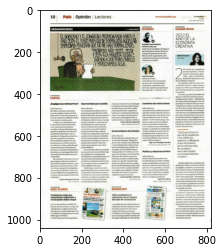

In [6]:
image_image_open = Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB")

# Print filename, size and class
print(f"Filename: A-IMAGE_{FILENAME}.jpg")
print(f"Size: {image_image_open.size}")
print(f"Class: {image_image_open.__class__}")

plt.imshow(image_image_open)

#### np.array

Filename: A-IMAGE_2022-01-03-p10.jpg
Shape: (1040, 820, 3)
Class: <class 'numpy.ndarray'>


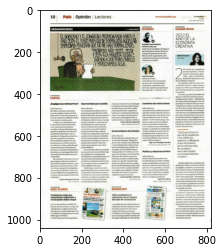

In [7]:
image_np_array = np.array(Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB"))

# Print filename, shape and class
print(f"Filename: A-IMAGE_{FILENAME}.jpg")
print(f"Shape: {image_np_array.shape}")
print(f"Class: {image_np_array.__class__}")

plt.imshow(image_np_array)

### Máscaras

#### RGB

Filename: A-RGB_2022-01-03-p10.png
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


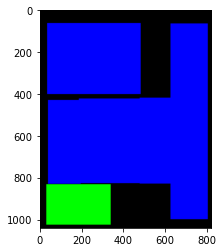

In [8]:
maskRGB_image_open = Image.open(f'A-RGB_{FILENAME}.png').convert("RGB")

# Print filename, size and class
print(f"Filename: A-RGB_{FILENAME}.png")
print(f"Size: {maskRGB_image_open.size}")
print(f"Class: {maskRGB_image_open.__class__}")

plt.imshow(maskRGB_image_open)

In [9]:
maskRGB_image_open.getcolors()

[(59251, (0, 255, 0)), (553703, (0, 0, 255)), (239846, (0, 0, 0))]

#### NPY

Filename: A-NPY_2022-01-03-p10.npy
Shape: (1040, 820)
Class: <class 'numpy.ndarray'>


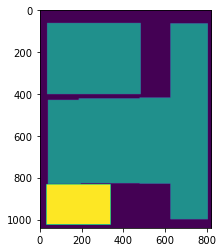

In [10]:
maskNPY_np_load = np.load(f'A-NPY_{FILENAME}.npy')

# Print filename, shape and class
print(f"Filename: A-NPY_{FILENAME}.npy")
print(f"Shape: {maskNPY_np_load.shape}")
print(f"Class: {maskNPY_np_load.__class__}")

plt.imshow(maskNPY_np_load)

In [11]:
maskNPY_np_load[1000][100], maskNPY_np_load[600][600], maskNPY_np_load[0][0]

(2, 1, 0)

In [12]:
# Value counts
unique, counts = np.unique(maskNPY_np_load, return_counts=True)
dict(zip(unique, counts))

{0: 239846, 1: 553703, 2: 59251}

#### SC

Filename: A-SC_2022-01-03-p10.png
Size: (820, 1040)
Class: <class 'PIL.Image.Image'>


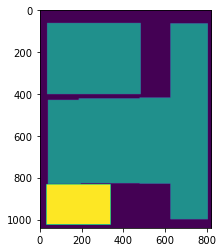

In [13]:
# sin convert       Ej: maskSC_image_open.getpixel((600, 600)) = 1
#.convert("L")      Ej: maskSC_image_open.getpixel((600, 600)) = 1
#.convert("RGB")    Ej: maskSC_image_open.getpixel((600, 600)) = (1,1,1)
maskSC_image_open = Image.open(f'A-SC_{FILENAME}.png').convert("L")

# Print filename, size and class
print(f"Filename: A-SC_{FILENAME}.png")
print(f"Size: {maskSC_image_open.size}")
print(f"Class: {maskSC_image_open.__class__}")

plt.imshow(maskSC_image_open)

In [14]:
maskSC_image_open.getpixel((100, 1000)), maskSC_image_open.getpixel((600, 600)), maskSC_image_open.getpixel((0, 0))

(2, 1, 0)

In [15]:
# Value counts
maskSC_image_open.getcolors()

[(239846, 0), (553703, 1), (59251, 2)]

Filename: A-SC_2022-01-03-p10.png
Shape: (1040, 820)
Class: <class 'numpy.ndarray'>


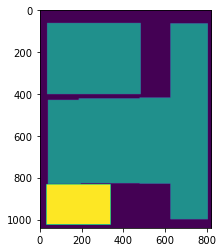

In [16]:
# sin convert       Ej: maskSC_np_array[600][600] = 1
#.convert("L")      Ej: maskSC_np_array[600][600] = 1
#.convert("RGB")    Ej: maskSC_np_array[600][600] = [1,1,1]
maskSC_np_array = np.array(Image.open(f'A-SC_{FILENAME}.png').convert("L"))

# Print filename, shape and class
print(f"Filename: A-SC_{FILENAME}.png")
print(f"Shape: {maskSC_np_array.shape}")
print(f"Class: {maskSC_np_array.__class__}")

plt.imshow(maskSC_np_array)

In [17]:
maskSC_np_array[1000][100], maskSC_np_array[600][600], maskSC_np_array[0][0]

(2, 1, 0)

In [18]:
# Value counts
unique, counts = np.unique(maskSC_np_array, return_counts=True)
dict(zip(unique, counts))

{0: 239846, 1: 553703, 2: 59251}

#### ONE

Filename: A-ONE_2022-01-03-p10.npy
Shape: (11, 1040, 820)
Class: <class 'numpy.ndarray'>


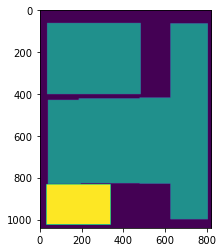

In [19]:
maskONE_np_load = np.load(f'A-ONE_{FILENAME}.npy')

# Print filename, shape and class
print(f"Filename: A-ONE_{FILENAME}.npy")
print(f"Shape: {maskONE_np_load.shape}")
print(f"Class: {maskONE_np_load.__class__}")

plt.imshow(np.argmax(maskONE_np_load, axis=0))

In [20]:
# Value counts of the maskONE
unique, counts = np.unique(np.argmax(maskONE_np_load, axis=0), return_counts=True)
dict(zip(unique, counts))


{0: 239846, 1: 553703, 2: 59251}

## Tranformaciones

#### Objetos

In [21]:
image_image_open = Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB")
image_np_array = np.array(Image.open(f'A-IMAGE_{FILENAME}.jpg').convert("RGB"))

maskRGB_image_open = Image.open(f'A-RGB_{FILENAME}.png').convert("RGB")
maskNPY_np_load = np.load(f'A-NPY_{FILENAME}.npy')
maskSC_image_open = Image.open(f'A-SC_{FILENAME}.png').convert("L")
maskONE_np_load = np.load(f'A-ONE_{FILENAME}.npy')


# Print name of the variable and class
print(f"Name: image_image_open      Class: {image_image_open.__class__}")
print(f"Name: image_np_array        Class: {image_np_array.__class__}")
print(f"\nName: maskRGB_image_open    Class: {maskRGB_image_open.__class__}")
print(f"Name: maskNPY_np_load       Class: {maskNPY_np_load.__class__}")
print(f"Name: maskSC_image_open     Class: {maskSC_image_open.__class__}")
print(f"Name: maskONE_np_load       Class: {maskONE_np_load.__class__}")

Name: image_image_open      Class: <class 'PIL.Image.Image'>
Name: image_np_array        Class: <class 'numpy.ndarray'>

Name: maskRGB_image_open    Class: <class 'PIL.Image.Image'>
Name: maskNPY_np_load       Class: <class 'numpy.ndarray'>
Name: maskSC_image_open     Class: <class 'PIL.Image.Image'>
Name: maskONE_np_load       Class: <class 'numpy.ndarray'>


#### Transformación

In [22]:
from torchvision import transforms
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Torchvision
tv_t = transforms.Compose([
    transforms.Resize((256, 256)), # modificar a 512
    
    transforms.ToTensor(),
])
tv_t_norm = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Albumentations
al_t = A.Compose([
    A.Resize(256,256),
    ToTensorV2()
])
al_t_norm = A.Compose([
    A.Resize(256,256),
    A.augmentations.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

In [29]:
def print_details(string, object):
    
    print(f"  {string} Class: {object.__class__}")

    try:
        print(f"  {string} Shape: {object.shape}")
    except:
        print(f"  {string} Size: {object.size}")

    # If string is mask, consider object is torch.Tensor to print unique values
    if string == "Mask":

        # torch.Size([256, 256, 3])
        if object.shape == torch.Size([256, 256, 3]):
            unique_values = torch.unique(object.reshape(-1, 3), dim=0)

        # torch.Size([3, 256, 256])
        if object.shape == torch.Size([3, 256, 256]):
            unique_values = torch.unique(object.reshape(3, -1), dim=1)

        # torch.Size([1, 256, 256])
        if object.shape == torch.Size([1, 256, 256]):
            unique_values = torch.unique(object)

        # torch.Size([256, 256])
        if object.shape == torch.Size([256, 256]):
            unique_values = torch.unique(object)
        
        # Print how much memory this tensor is using in Mb
        print(f"  {string} Memory: {object.element_size() * object.nelement() / 1024 / 1024} Mb")

        # Print the unique values
        print(f"  {string} Unique values: {unique_values}")

In [24]:
def mask_value_counts(mask_selected):
    try:
        print(mask_selected.getcolors())
    except:
        try:

            if maskONE_np_load.shape == mask_selected.shape:
                mask_selected = np.argmax(mask_selected, axis=0)

            unique, counts = np.unique(mask_selected, return_counts=True)
            print(dict(zip(unique, counts)))

        except:
            print("Error: mask_value_counts")

In [35]:
def transform_test(image_selected, mask_selected):

    print("Mask value counts before Transformation")
    mask_value_counts(mask_selected)
    print(mask_selected.__class__)

    print(f"\n=============================================================")
    print(f"TORCHVISION")
    print(f"=============================================================")
    # Test [tv_t] v1
    try:
        image = tv_t(image_selected)
        mask = tv_t(mask_selected)

        print("Test [tv_t] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)

    except:
        print("Test [tv_t] v1: Failed")

    # Test [tv_t] v2
    try:
        image = np.array(image_selected)
        mask = np.array(mask_selected)

        image = tv_t(image)
        mask = tv_t(mask)

        print("Test [tv_t] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)

    except:
        print("Test [tv_t] v2: Failed")

    # Test [tv_t_norm] v1
    try:
        image = tv_t_norm(image_selected)
        mask = tv_t_norm(mask_selected)

        print("Test [tv_t_norm] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [tv_t_norm] v1: Failed")

    # Test [tv_t_norm] v2
    try:
        image = np.array(image_selected)
        mask = np.array(mask_selected)

        image = tv_t_norm(image)
        mask = tv_t_norm(mask)

        print("Test [tv_t_norm] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [tv_t_norm] v2: Failed")

    print(f"\n=============================================================")
    print(f"ALBUMENTATIONS")
    print(f"=============================================================")
    # Test [al_t] v1
    try:
        aug = al_t(image=image_selected, mask=mask_selected)

        image = aug['image']
        mask = aug['mask']

        print("Test [al_t] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t] v1: Failed")

    # Test [al_t] v2
    try:

        image = np.array(image_selected)
        mask = np.array(mask_selected)

        aug = al_t(image=image, mask=mask)

        image = aug['image']
        mask = aug['mask']

        print("Test [al_t] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t] v2: Failed")

    # Test [al_t_norm] v1
    try:
        aug = al_t_norm(image=image_selected, mask=mask_selected)

        image = aug['image']
        mask = aug['mask']

        print(f"Test [al_t_norm] v1: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t_norm] v1: Failed")

    # Test [al_t_norm] v2
    try:

        image = np.array(image_selected)
        mask = np.array(mask_selected)

        aug = al_t_norm(image=image, mask=mask)

        image = aug['image']
        mask = aug['mask']

        print(f"Test [al_t_norm] v2: Passed")

        # Details of image and mask
        print_details('Image', image)
        print_details('Mask', mask)
    except:
        print("Test [al_t_norm] v2: Failed")

In [36]:
# Testing

image_selected = image_image_open # image_image_open, image_np_array

mask_selected = maskRGB_image_open # maskRGB_image_open, maskNPY_np_load, maskSC_image_open, maskONE_np_load

print(f"File: {FILENAME}\n")

transform_test(image_selected, mask_selected)

File: 2022-01-03-p10

Mask value counts before Transformation
[(59251, (0, 255, 0)), (553703, (0, 0, 255)), (239846, (0, 0, 0))]
<class 'PIL.Image.Image'>

TORCHVISION
Test [tv_t] v1: Passed
  Image Class: <class 'torch.Tensor'>
  Image Shape: torch.Size([3, 256, 256])
  Mask Class: <class 'torch.Tensor'>
  Mask Shape: torch.Size([3, 256, 256])
  Mask Memory: 0.75 Mb
  Mask Unique values: tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 